# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [1]:
# Imports

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Read data

file = '../data/baseball_100_ok.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.433895,18.39,42.383479
1,0.497875,18.39,36.936950
2,0.507734,18.39,36.219761
3,0.510163,18.39,36.047319
4,0.486942,18.39,37.766291


In [3]:
# Shape

data.shape

(100, 3)

In [4]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,100.000000,1.000000e+02,100.000000
mean,0.470783,1.839000e+01,39.214015
std,0.028966,3.927673e-14,2.489707
min,0.412449,1.839000e+01,35.889372
25%,0.447718,1.839000e+01,36.968963
50%,0.474321,1.839000e+01,38.771293
75%,0.497444,1.839000e+01,41.074952
max,0.512408,1.839000e+01,44.587299


'../data/baseball_100_ok.csv'

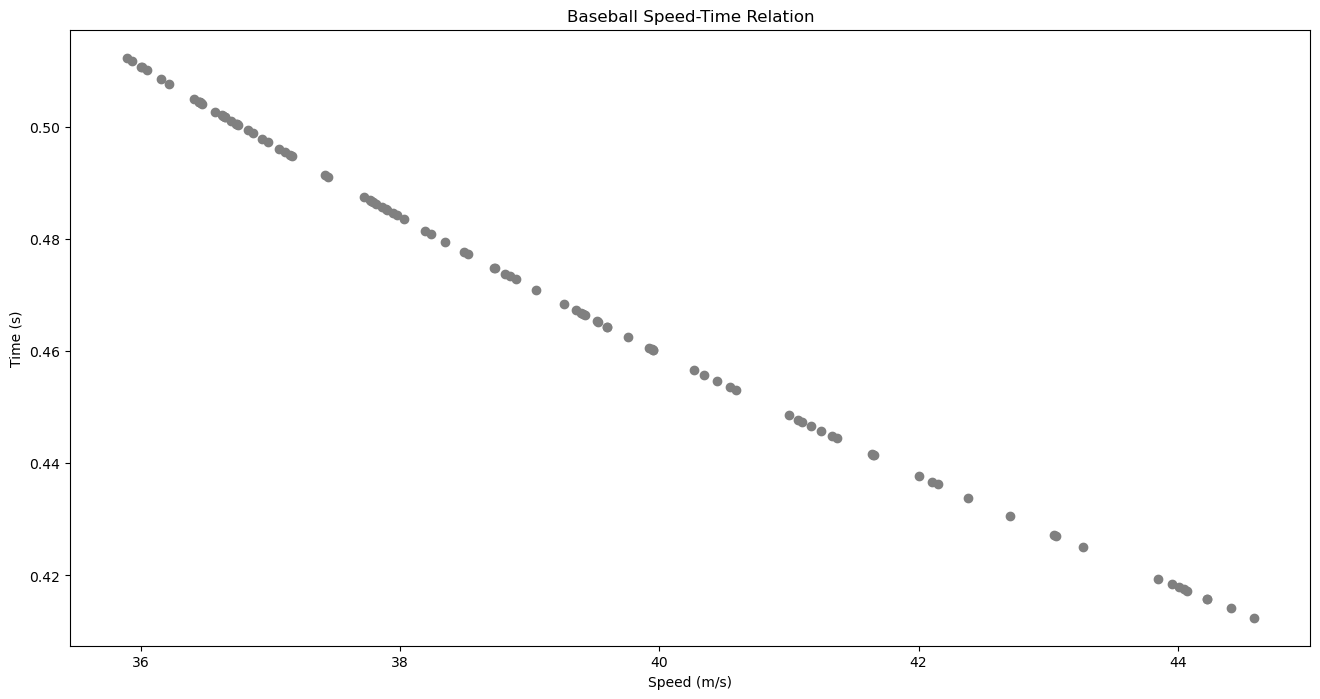

In [5]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [ ]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

In [ ]:
X

In [ ]:
y

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

In [ ]:
X_train.describe()

In [ ]:
y_train.describe()

In [ ]:
X_test.describe()

In [ ]:
y_test.describe()

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [ ]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

In [ ]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

In [ ]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

In [ ]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

### _Linear Regression (the-real-stuff)_ 

In [ ]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

In [ ]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

In [ ]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

In [ ]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

In [ ]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

---

### _Random Forest Regressor (test-in-training)_ 

In [ ]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

In [ ]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

In [ ]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

In [ ]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

### _Random Forest Regressor (the-real-stuff)_ 

In [ ]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

In [ ]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

In [ ]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

In [ ]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

In [ ]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

---